# <span style="color:blue">  Esercitazione 8</span>

## Esercizio 8.1

In questa esercitazione si sfrutta l'algoritmo del simulated annealing (SA) per risolvere un problema di ottimizzazione dei parametri di una funzione d'onda. In particolare, si considera un sistema quantistico unidimensionale ad una particella priva di spin sottoposta al potenziale
$$
V(x) = x^4 - \frac{5}{2}x^2
$$
Questo problema può essere visto come una variante dell'oscillatore armonico. Tuttavia, in questo caso, il problema di Schroedinger associato non ammette soluzione analitica esatta. Questo problema viene generalmente affrontato con i metodi variazionali. Presa una funzione d'onda di test qualunque, il valore di aspettazione dell'hamiltoniana è maggiore o uguale dell'energia del ground state
$$
\langle {\hat H} \rangle_T = 
\frac{\int dx \Psi^*_T(x) {\hat H} \Psi_T(x)}
{\int dx |\Psi_T(x)|^2} \ge E_0 =
\frac{\langle \Psi_0| {\hat H} | \Psi_0 \rangle}
{\langle \Psi_0 | \Psi_0 \rangle}
$$
dove $\Psi_T(x)$ è la funzione d'onda di test e $\Psi_0(x)$ l'esatto autostato del ground state. 

Come funzione d'onda di test prendiamo
$$
\Psi_T^{\sigma,\mu}(x) = e^{-\frac{(x-\mu)^2}{2\sigma^2}}+e^{-\frac{(x+\mu)^2}{2\sigma^2}}
$$
dipendente da due parametri liberi $\mu,\sigma$. I principi variazionali garantiscono che il ground state esiste unico e con autovalore associato minimo. Segue che il problema può essere affrontato come un problema di ottimizzazione, ovvero si ricercano i valori di $\mu,\sigma$ tali da minimizzare il valore di aspettazione di $\hat{H}$ sulla funzione di test $\Psi_T(x)$. La soluzione ottenuta mira ad essere quanto più vicina possibile all'esatta soluzione $\Psi_0(x)$.

Lavoriamo in unità $\hbar=m=1$. Per calcolare $\langle \hat{H} \rangle_T$ osserva che
$$
\langle {\hat H} \rangle_T = 
\frac{\int dx \Psi^*_T(x) {\hat H} \Psi_T(x)}{\int dx |\Psi_T(x)|^2} = 
\int dx \frac{|\Psi_T(x)|^2}{\int dx |\Psi_T(x)|^2} \frac{{\hat H} \Psi_T(x)}{\Psi_T(x)}
$$
Pertanto, è sufficiente generare le coordinate $x$ con l'algoritmo di Metropolis per campionare la distribuzione di probabilità $|\Psi_T(x)|^2$ (già normalizzata). Si calcola quindi $\hat{H}\Psi_T(x)$ per i valori di $x$ campionati e si divide per $\Psi_T(x)$. Per il termine potenziale $\hat{V}$ questo è banalmente $V(x)$. Il termine cinetico $\hat{K}$, invece, agisce come $-\frac{\hbar^2}{2m}\frac{\partial^2}{\partial x^2} = -\frac{1}{2}\frac{\partial^2}{\partial x^2}$ in rappresentazione delle posizioni. Pertanto, si deve calcolare
$$
\hat{K}\Psi_T(x) = -\frac{1}{2}\frac{\partial^2}{\partial x^2}\Psi_T(x) = -\frac{1}{2\sigma^2}\Big[\frac{(x-\mu)^2}{\sigma^2}-1\Big]e^{-\frac{(x-\mu)^2}{2\sigma^2}} -\frac{1}{2\sigma^2}\Big[\frac{(x+\mu)^2}{\sigma^2}-1\Big]e^{-\frac{(x+\mu)^2}{2\sigma^2}}
$$
da normalizzare infine per $\Psi_T(x)$. Infine, il valore dell'integrale si ottiene dividendo per il numero di coordinate $x$ generate.

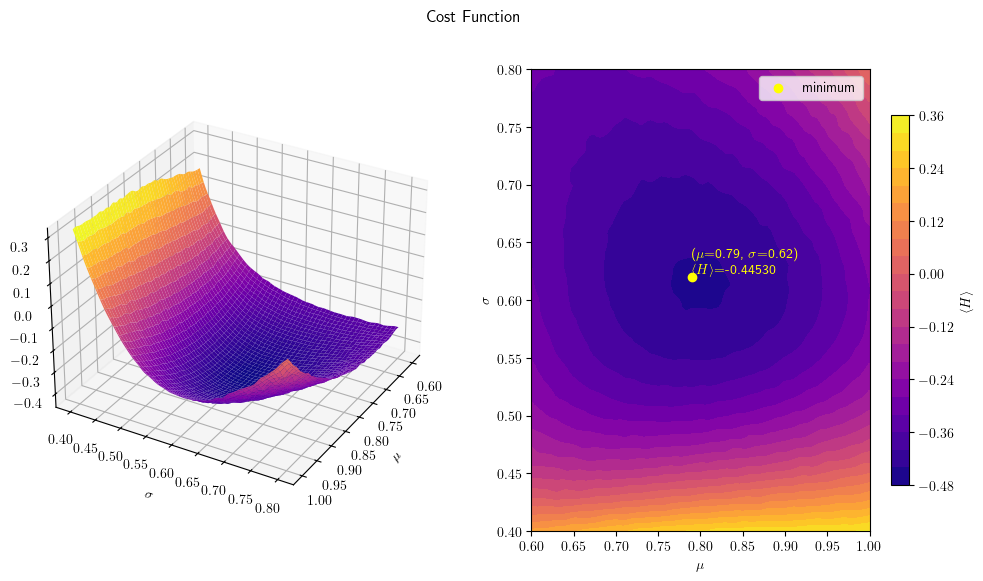

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from scipy.interpolate import griddata

# File per curve di livello di <H> in funzione di mu, sigma
data = np.loadtxt("costfunction.out", skiprows=1)
x = data[:, 0]
y = data[:, 1]
f = data[:, 2]

# Determinazione del minimo e relativi parametri
index_min = np.argmin(f)
mu_min = x[index_min]
sigma_min = y[index_min]
H_min = f[index_min]

# Interpolazione dati per costruzione curve di livello
X, Y = np.meshgrid(np.linspace(min(x), max(x), 100), np.linspace(min(y), max(y), 100))
Z = griddata((x, y), f, (X, Y), method='cubic')

# Plot grafico
fig = plt.figure(figsize=(12, 6))
plt.rcParams['text.usetex'] = True
fig.suptitle('Cost Function')

# Grafico di sinistra: vista 3d funzione R2 -> R
ax1 = fig.add_subplot(121, projection='3d')
surf2 = ax1.plot_surface(X, Y, Z, cmap='plasma', edgecolor='none')

ax1.set_xlabel('$\mu$')
ax1.set_ylabel('$\sigma$')
ax1.set_zlabel('$\\langle H \\rangle$')
ax1.view_init(elev=30, azim=30)

# Grafico di destra: stesso grafico ma vista curve di livello con minimo
ax2 = fig.add_subplot(122)
surf2 = ax2.contourf(X, Y, Z, cmap='plasma', levels=20)
ax2.scatter(mu_min, sigma_min, color='yellow', label='minimum') # Minimo
ax2.text(mu_min, sigma_min, f'($\mu$={mu_min:.2f}, $\sigma$={sigma_min:.2f})\n$\\langle H \\rangle$={H_min:.5f}', fontsize=10, color='yellow', ha='left', va='bottom')

cbar2 = plt.colorbar(surf2, ax=ax2, extend='both', orientation='vertical', shrink=0.8) # Barre di colore
cbar2.set_label('$\\langle H \\rangle$')

ax2.set_xlabel('$\mu$')
ax2.set_ylabel('$\sigma$')

ax2.legend()
plt.show()

Prima di procedere con la simulazione vera e propria, si è generata per punti la funzione costo che si intende minimizzare, ovvero il valore di aspettazione dell'hamiltoniana $\langle H \rangle$. Questo è stato fatto per avere un'idea sia dell'andamento della funzione stessa che dei valori di $\mu,\sigma$ in corrispondenza del minimo.

Si sono presi in considerazione step di 0.01 sia su $\sigma$ che su $\mu$. Al variare di questi parametri (e quindi della funzione d'onda di test $\Psi_T(x)$), si è calcolato il valore di $\langle H \rangle$. Ogni singolo valore calcolato utilizza $10^3$ generazioni della coordinata $x$ e il valore finale per assegnati $\mu,\sigma$ è calcolato con la media a blocchi con 20 blocchi da 50 valori ciascuno. In totale, si tratta di 1600 valori di $\langle H \rangle$, ciascuno calcolato con media a blocchi, per un totale di $1.6\cdot10^9$ generazioni di coordinate con Metropolis. Le funzione viene mostrata in maniera continua avendo interpolato per i punti discreti campionati.

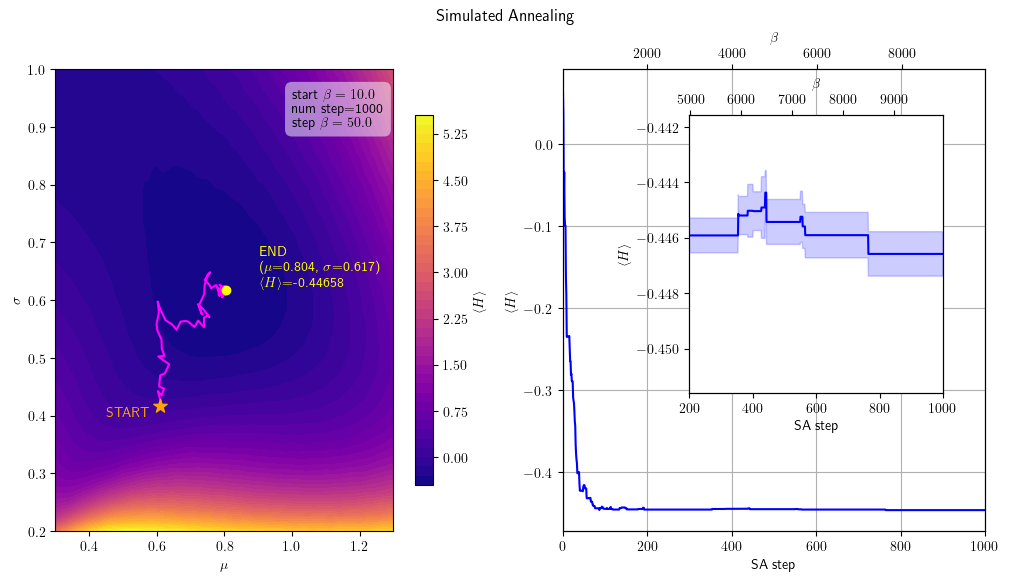

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from scipy.interpolate import griddata

# File per curve di livello di <H> in funzione di mu, sigma
data1 = np.loadtxt("costfunction_extended.out", skiprows=1)
x1 = data1[:, 0]
y1 = data1[:, 1]
f1 = data1[:, 2]

# File con path simulated annealing
data2 = np.loadtxt("simulated_annealing.out", skiprows=4)
beta = data2[:, 0]
x2 = data2[:, 1]
y2 = data2[:, 2]
f2 = data2[:, 3]
f2_err = data2[:, 4]
SAstep = np.linspace(0, f2.size, f2.size)

# Interpolazione dati per costruzione curve di livello 
X, Y = np.meshgrid(np.linspace(min(x1), max(x1), 100), np.linspace(min(y1), max(y1), 100))
Z = griddata((x1, y1), f1, (X, Y), method='cubic')

# Plot grafico
fig = plt.figure(figsize=(12, 6))
plt.rcParams['text.usetex'] = True
fig.suptitle('Simulated Annealing')

# Grafico di sinistra: curve di livello di <H> e path simulated annealing
ax1 = fig.add_subplot(121)
surf2 = ax1.contourf(X, Y, Z, cmap='plasma', levels=50) # Curve di livello
ax1.plot(x2, y2, color='magenta') # Path SA

# Punto di partenza path SA
ax1.scatter(x2[0], y2[0], color='orange', marker='*', s=100, zorder=11)
ax1.annotate('START', xy=(x2[0], y2[0]), xytext=(x2[0]-0.03, y2[0]), fontsize=10,
            color='orange', ha='right', va='top', zorder=11)

# Punto di arrivo path SA
ax1.scatter(x2[-1], y2[-1], color='yellow', zorder=11)
ax1.annotate(f'END\n($\mu$={x2[-1]:.3f}, $\sigma$={y2[-1]:.3f})\n$\\langle H \\rangle$={f2[-1]:.5f}',
            xy=(x2[-1], y2[-1]), xytext=(x2[-1]+0.1, y2[-1]), fontsize=10,
            color='yellow', ha='left', va='bottom', zorder=11)

# Info su beta path SA
annotation_text = 'start $\\beta=10.0$\nnum step=1000\nstep $\\beta=50.0$'
ax1.annotate(annotation_text, xy=(1.0, 0.9), xycoords='data', bbox=dict(boxstyle='round,pad=0.5', facecolor='white', edgecolor='none', alpha=0.5))

ax1.set_xlabel('$\mu$')
ax1.set_ylabel('$\sigma$')
cbar2 = plt.colorbar(surf2, ax=ax1, extend='both', orientation='vertical', shrink=0.8)
cbar2.set_label('$\\langle H \\rangle$')

# Grafico di destra: <H> in funzione dello step SA / temperatura beta
ax2 = fig.add_subplot(122)

# Valore di aspettazione di H
ax2.plot(SAstep, f2, c='b')
ax2.set_xlabel("SA step")
ax2.set_ylabel("$\\langle H \\rangle$")
ax2.set_xlim(0,f2.size)
ax2.grid(True)

# Asse x alternativo equivalente per temperature
ax3 = ax2.twiny()
ax3.set_xlim(np.amin(beta), np.amax(beta))
ax3.set_xlabel("$\\beta$")

# Zoom su step finali SA con errore
ax4 = ax2.inset_axes([0.3, 0.3, 0.6, 0.6]) 
ax4.plot(SAstep, f2, c='b')
ax4.fill_between(SAstep, f2-f2_err, f2+f2_err, alpha=0.2, color='b', label='1 $\\sigma$')
ax4.set_xlim(int(0.2 * SAstep.size), SAstep.size)
ax4.set_ylim(f2[-1]-0.005, f2[-1]+0.005)
ax4.set_xlabel("SA step")
ax4.set_ylabel("$\\langle H \\rangle$")

# Asse x alternativo equivalente per temperature
ax5 = ax4.twiny() 
ax5.set_xlim(0.5 * np.amax(beta), np.amax(beta))
ax5.set_xlabel("$\\beta$")

plt.show()

Si è poi passati alla simulazione vera e propria del simulated annealing. Questa simulazione si basa sulla scelta di un certo di numero di parametri e si è cercato di ottimizzare ciascuno di questi al meglio. 

Una serie di parametri riguarda la generazione delle coordinate $x$ con Metropolis per il campionamento della funzione d'onda. Ogni campionamento usa $10^3$ coordinate con step di $d_x=2.5$. In questo modo di è osservato che l'accettazione sulle mosse dell'algoritmo di Metropolis si attesta intorno al 50% (con una certa oscillazione al variare di $\mu,\sigma$). Per il calcolo del valore di $\langle H \rangle$ assegnati $\mu,\sigma$ si è utilizzata la media a blocchi per 20 blocchi da 50 valori ciascuno, quindi $10^3$ valori singoli di $\langle H \rangle$ ciascuno calcolato con $10^3$ valori di $x$. 

Una seconda parte riguarda la scelta degli step con cui variare i parametri $\mu,\sigma$. Come dimensioni degli step si sono scelte $d_{\mu}=0.02$ e $d_{\sigma}=0.02$. I nuovi valori sono proposti a partire da una distribuzione uniforme centrata sui valori precedenti in un intervallo di ampiezza pari al doppio della dimensione dello step.

L'ultima parte riguarda la scelta di come programmare l'algoritmo del simulated annealing vero e prorpio, quindi temperatura di partenza, step di temperatura, quante temperature simulare e quante iterazioni dell'algoritmo di Metropolis con peso di Boltzmann per fissata temperatura. La temperatura di partenza è stata fissata a $\beta=10$. La dimensione dello step è stata fissata a $\Delta\beta=50$ per 200 temperature differenti. Quindi si parte da $\beta_i=10$ fino a $\beta_f=9960$. Per ogni temperatura si eseguono 5 step dell'algoritmo di Metropolis, per un totale di $10^3$ step in totale. 

In figura a sinistra viene mostrata l'evoluzione del percorso seguito dal SA nello spazio dei parametri $\mu,\sigma$. Si è osservato che la scelta dei parametri è adeguata a far convergere l'algoritmo comunque scelti i valori iniziali di $\mu,\sigma$ (almeno nell'intervallo $\mu\in[0.6,1]$ e $\sigma\in[0.4,0.8]$). L'algoritmo converge a $\mu=0.804$ e $\sigma=0.617$ ottenendo $\langle H \rangle =-0.44658$. A destra viene mostrata la stessa evoluzione della funzione costo in funzione dello step dell'algoritmo SA (o equivalentemente della temperatura $\beta$). Si è fatto poi uno zoom sugli step finali dell'algoritmo (lo specchietto). Questo mostra che eventuali variazioni su $\langle H \rangle$ sono compatibili entro l'errore, da cui concludiamo che l'algoritmo è giunto a convergenza.

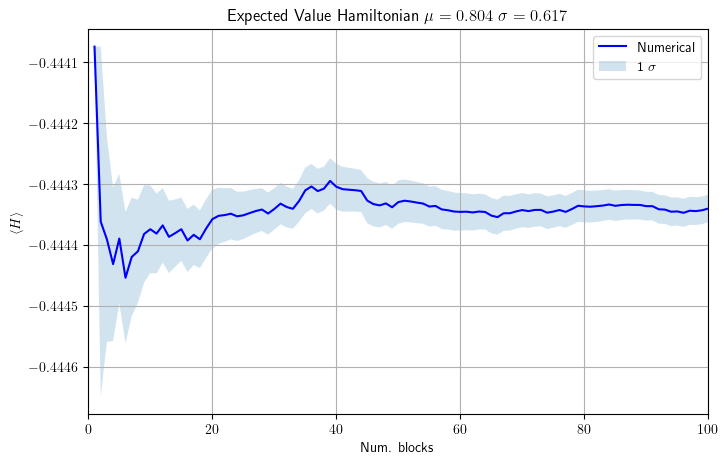

In [6]:
import matplotlib.pyplot as plt
import numpy as np

# File con numero blocchi, <H> ed incertezza statistica
data = np.loadtxt("hamiltonian.out", skiprows=4)
block = data[:,0]
ave = data[:,1]
err = data[:,2]

# Plot <H> con errore in funzione del numero di blocchi
fig = plt.figure(figsize=(8, 5))
plt.rcParams['text.usetex'] = True

plt.plot(block, ave, color='blue', label='Numerical')
plt.fill_between(block, ave-err, ave+err, alpha=0.2, label='1 $\\sigma$')

plt.xlabel('Num. blocks')
plt.ylabel('$\\langle H \\rangle$')
plt.title('Expected Value Hamiltonian $\\mu = 0.804$ $\\sigma = 0.617$')
plt.xlim(0, 100)
plt.legend()
plt.grid(True)

plt.show()

I valori di $\mu,\sigma$ sono stati quindi fissati una volta ottimizzati dal SA. Il valore di $\langle H \rangle$ viene quindi calcolato con la media a blocchi utilizzando $10^2$ blocchi da $10^4$ valori ciascuno. Ogni valore di $\langle H \rangle$ è calcolato generando $10^3$ coordinate per il campionamento della funzione densità di probabilità. 

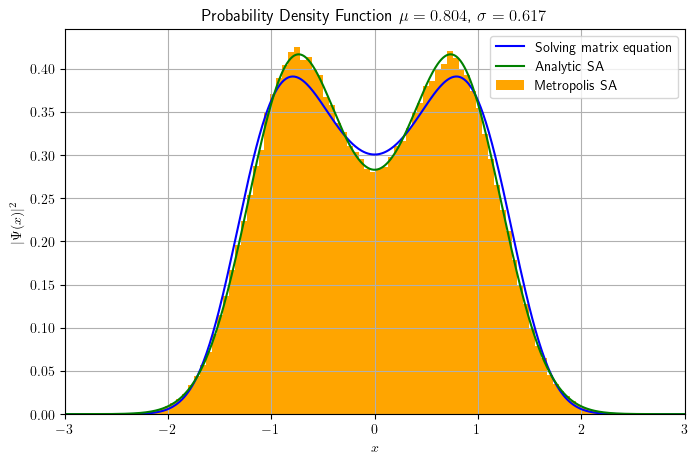

In [7]:
import matplotlib.pyplot as plt
import numpy as np

# Soluzione numerica dell'eq. di Schrodinger con metodo matriciale
def Vpot(x): # Potenziale
    return (x**2 - 2.5)*x**2
    #return 0.5*x**2

hbar = 1 # Costante di Planck ridotta 
m = 1 # Massa
a = 10 # Range 
N = 1000 # Numero iterazioni
x = np.linspace(-a/2, a/2, N) # Step
dx = x[1] - x[0] # Dimensione step
V = Vpot(x)

# Metodo delle differenze centrali: f" = (f_1 - 2*f_0 + f_-1)/dx^2
CDiff = np.diag(np.ones(N-1),-1)-2*np.diag(np.ones(N),0)+np.diag(np.ones(N-1),1)
# Rappresentazione matriciale hamiltoniana
H = (-(hbar**2)*CDiff)/(2*m*dx**2) + np.diag(V)
# Calcolo autovettori e autovalori
E,psi = np.linalg.eigh(H) 

# Trasposta della matrice e normalizzazione
psi = np.transpose(psi)
psi = psi/np.sqrt(dx)



# Densità di probabilità campionata con Metropolis con parametri ottimizzati da SA
data = np.loadtxt("density_function.out", skiprows=1)
x_metro = data[:, 0]



# Espressione analitica con parametri ottimizzati da SA
def Psi2(x, mu, sigma):
    gauss_sx = np.exp(-0.5 * ((x - mu) / sigma) ** 2)
    gauss_dx = np.exp(-0.5 * ((x + mu) / sigma) ** 2)
    norm = 1 / (2 * sigma * (1 + np.exp(- (mu / sigma) ** 2)) * np.sqrt(np.pi))
    return norm * (gauss_sx + gauss_dx) ** 2

x_psi = np.linspace(-3, 3, 1000)
y_psi = Psi2(x_psi, 0.804, 0.617)



# Grafico
plt.figure(figsize=(8,5))
plt.rcParams['text.usetex'] = True

scale = 0.3
plt.plot(x,(psi[0])**2, c='b', label="Solving matrix equation")
plt.plot(x_psi, y_psi, c='g', label="Analytic SA")
plt.hist(data[:,0], bins=100, density=True, color='orange', label="Metropolis SA")

plt.title("Probability Density Function $\mu=0.804$, $\sigma=0.617$")
plt.xlabel("$x$")
plt.ylabel("$|\Psi(x)|^2$")
plt.xlim((-3,3))
plt.legend()
plt.grid(True)

plt.show()

In figura viene mostrata la soluzione numerica ottenuta risolvendo l'equazione di Schroedinger in forma matriciale (in blu). Viene poi mostrata la funzione $\Psi_T(x)$ che abbiamo utilizzato come ansatz per i parametri ottimizzati di $\mu,\sigma$, opportunamente normalizzata (in verde). Infine, la stessa funzione viene mostrata come densità di probabilità campionata dall'algoritmo di Metropolis con $10^6$ generazioni di coordinate $x$ (istogramma arancione). Ovviamente, il profilo dell'istogramma segue quello di $\Psi_T(x)$. Questo si discosta leggermente dal profilo previsto dalla soluzione matriciale. In effetti, questa prevede che il ground state abbia energia $E_0\approx-0.460$, mentre nel nostro caso la convergenza è a $E_T\approx-0.444$. Chiaramente viene verificato il fatto che $E_T>E_0$ in virtù del fatto che la nostra è una soluzione approssimata.